<a href="https://colab.research.google.com/github/szalszabila23/ARIMA-Forecasting/blob/main/copy_of_projek_ds_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

Pergerakan harga saham Telkom Indonesia . PT. Telkom Indonesia (Persero) Tbk (TLKM) adalah badan usaha milik negara yang bergerak di sektor jasa telekomunikasi dan jaringan di Indonesia. Perusahaan ini menawarkan berbagai layanan jaringan dan telekomunikasi, termasuk layanan telekomunikasi dasar domestik dan internasional, menggunakan layanan kabel, telepon tetap nirkabel ("CDMA") dan Global System for Mobile Communication ("GSM") serta layanan interkoneksi yang digunakan antara lain Other License Operators ("OLO"). Selain layanan telekomunikasi, Telkom juga mengoperasikan bisnis Multimedia seperti konten dan aplikasi, melengkapi portofolio bisnis mereka yang disebut Telekomunikasi, Informasi, Media, Edutainment and Services ("TIMES").


- Open adalah harga pembukaan saham pada saat transaksi dimulai dalam suatu periode transaksi. Biasanya, harga pembukaan sama dengan harga penutupan transaksi hari sebelumnya.

- High menunjukkan harga tertinggi yang pernah terjadi dalam suatu periode perdagangan.

- Low menunjukkan harga terendah yang pernah terjadi dalam suatu periode perdagangan.

- Close menunjukkan harga penutupan suatu saham dalam satu hari perdagangan.

- Adj. Close adalah harga penutupan saham yang sudah disesuaikan (adjusted closing price)

In [ ]:
data = pd.read_csv("TLKM.JK.csv")

UnicodeDecodeError: ignored

In [ ]:

# Menampilkan hasil
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900
...,...,...,...,...,...,...,...
1416,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100
1417,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800
1418,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300
1419,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400


# Eksplorasi Data

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data = data.drop(['Open','High','Low','Adj Close','Volume'],axis='columns')

In [ ]:
print(data.dtypes)

Date      object
Close    float64
dtype: object


In [ ]:
data

,Date,Close
0,2017-01-02,3980.0
1,2017-01-03,3950.0
2,2017-01-04,3950.0
3,2017-01-05,3950.0
4,2017-01-06,4000.0
...,...,...
1416,2022-08-26,4490.0
1417,2022-08-29,4520.0
1418,2022-08-30,4480.0
1419,2022-08-31,4560.0


In [ ]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1421, freq=None)

In [ ]:
data

,Close
Date,
2017-01-02,3980.0
2017-01-03,3950.0
2017-01-04,3950.0
2017-01-05,3950.0
2017-01-06,4000.0
...,...
2022-08-26,4490.0
2022-08-29,4520.0
2022-08-30,4480.0


In [ ]:
#Menginisialkan variabel High sebagai data time series
ts = data['Close']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3950.0
2017-01-04    3950.0
2017-01-05    3950.0
2017-01-06    4000.0
2017-01-09    4020.0
2017-01-10    4000.0
2017-01-11    3960.0
2017-01-12    3960.0
2017-01-13    3950.0
Name: Close, dtype: float64

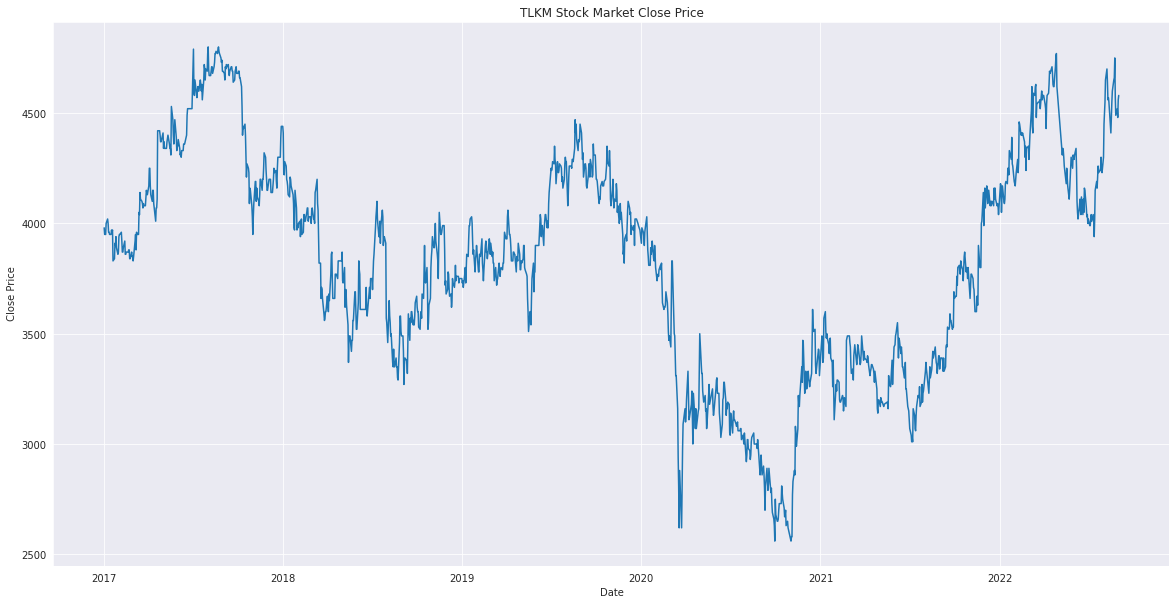

In [ ]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel(' Close Price')
plt.title('TLKM Stock Market Close Price')
plt.plot(data['Close'])

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

## Uji Stasioneritas Data

In [ ]:
import pandas as pd
import numpy as np

# baca data
df = pd.read_csv('TLKM.JK 1.csv')

# mengisi missing value pada baris dengan mean hanya pada kolom numerik
df_numeric = df.select_dtypes(include=np.number) # pilih kolom numerik saja
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean(axis=1)) # isi missing value dengan mean pada kolom numerik



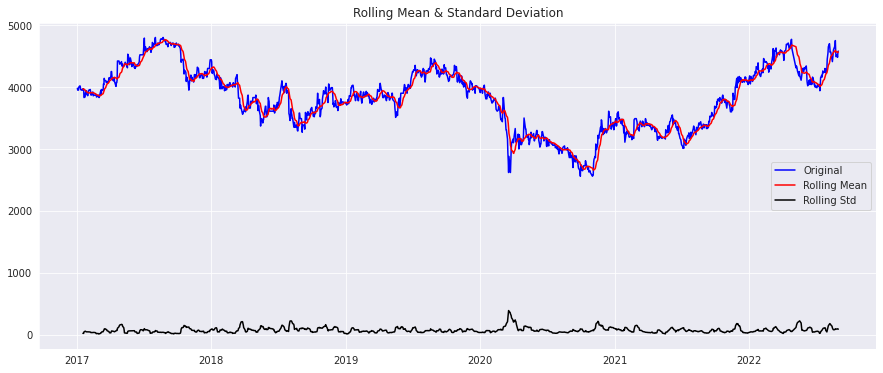

Results of Dickey-Fuller Test:
Test Statistic                   -1.887198
p-value                           0.338107
#Lags Used                        2.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value > 0,05, maka H0 tidak diterima.

Jadi, data memiliki keadaan tidak stasioner stasioner.

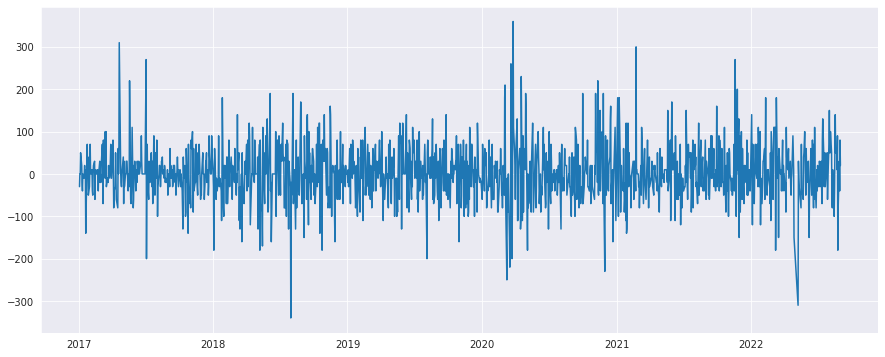

In [ ]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

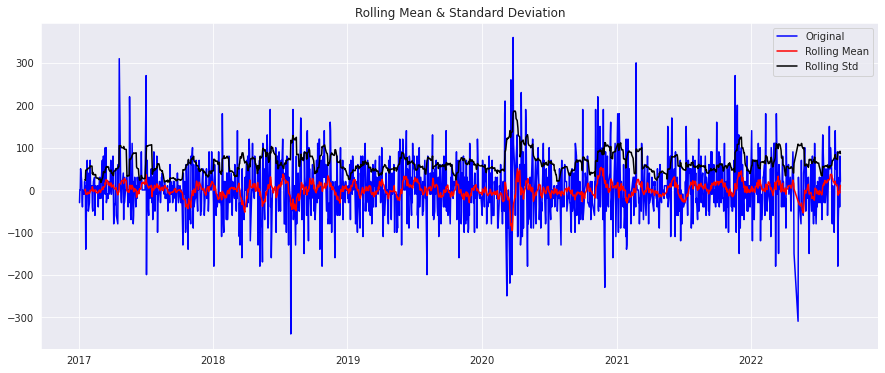

Results of Dickey-Fuller Test:
Test Statistic                  -31.277874
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
test_stationarity(ts_diff_1)

Setelah dilakukan proses differencing dan diuji stasioneritas data (setelah differencing), diperoleh data setelah differencing 1x telah membentuk data yang stasioner.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


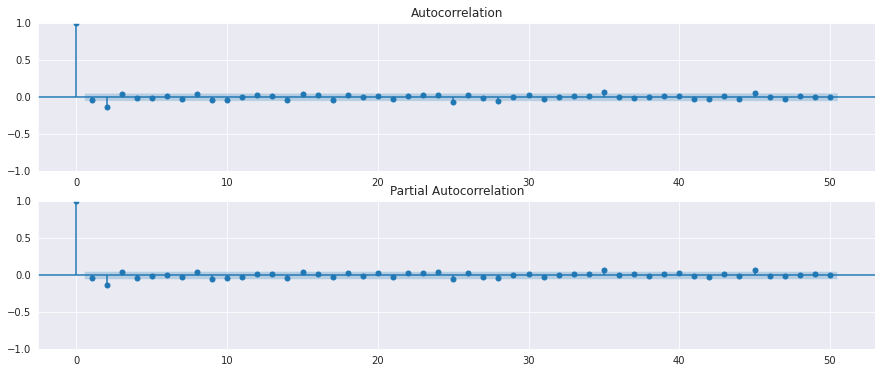

In [ ]:
from statsmodels.tsa.stattools import pacf
# pacf_values = pacf(data, method='ywm')
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=50)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=50)
plt.show()

Plot ACF dan plot PACF dibentuk untuk mengetahui orde dari AR dan MA, sehingga bisa diketahui model yang sesuai untuk data.

In [ ]:

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.80)               #data trainingnya 80%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mape = np.mean(np.abs((test - predictions) / test)) * 100
	return mape

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mape = evaluate_arima_model(dataset, order)
					if mape < best_score:
						best_score, best_cfg = mape, order
					print('ARIMA%s MAPE=%.3f' % (order,mape))
				except:
					continue
	print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=10.807
ARIMA(0, 0, 1) MAPE=5.938
ARIMA(0, 0, 2) MAPE=3.710
ARIMA(0, 1, 0) MAPE=1.250
ARIMA(0, 1, 1) MAPE=1.244
ARIMA(0, 1, 2) MAPE=1.253
ARIMA(1, 0, 0) MAPE=1.253
ARIMA(1, 0, 1) MAPE=1.249
ARIMA(1, 0, 2) MAPE=1.253
ARIMA(1, 1, 0) MAPE=1.245
ARIMA(1, 1, 1) MAPE=1.247
ARIMA(1, 1, 2) MAPE=1.251
ARIMA(2, 0, 0) MAPE=1.250
ARIMA(2, 0, 1) MAPE=1.262
ARIMA(2, 0, 2) MAPE=1.251
ARIMA(2, 1, 0) MAPE=1.252
ARIMA(2, 1, 1) MAPE=1.251
ARIMA(2, 1, 2) MAPE=1.252
Best ARIMA(0, 1, 1) MAPE=1.244


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 3
- orde d = 0 dan 2
- orde q = 0 dan 3

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (0,1,1).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 dan dataset telah mengalami 1x proses differencing.

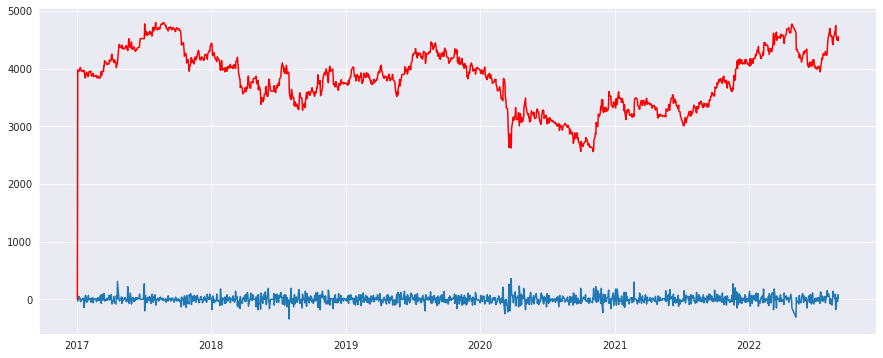

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(ts, order=(0,1,1))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
plt.plot(ts_diff_1)
plt.plot(predictions_ARIMA, color='red')


In [ ]:
#Informasi yang diperoleh dari pemodelan ARIMA(1,0,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1421
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -7984.600
Date:                Tue, 21 Mar 2023   AIC                          15973.200
Time:                        14:58:05   BIC                          15983.717
Sample:                             0   HQIC                         15977.129
                               - 1421                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0572      0.021     -2.659      0.008      -0.099      -0.015
sigma2      4482.9316    108.960     41.143      0.000    4269.373    4696.490
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               467.04
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.25
Prob(H) (two-sided):                  0.14   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediksi Data

In [ ]:
#Prediksi data dengan model ARIMA(0,1,1) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1421,end=1430)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

1421     9158.602599
1422    18315.807797
1423    32051.615595
1424    50366.025992
1425    73259.038987
dtype: float64


Hasil prediksi jauh dari data sebelumnya, ini bisa menunjukkan bahwa model ARIMA yang digunakan mungkin tidak cocok untuk data yang sedang diprediksi atau tidak dapat menangkap pola atau tren dalam data dengan benar.